<a href="https://colab.research.google.com/github/Bichitrananda/Performance-evaluation-of-Machine-learning-algorithms-in-Biomedical-Document-Classification/blob/master/BC3_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os
os.getcwd()

'/content'

In [0]:
cd gdrive/My Drive

/content/gdrive/My Drive


In [0]:
ls

 20_cnn_model.json             'Getting started.pdf'
 20n_cnn_model1.json            glove.6B.50d.txt
 20n_cnn_model.json             IMDB_weights.best.hdf5
 20news_weights.best1.hdf5      MISSION/
 20news_weights.best.hdf5       model.json
 BC3_part1.csv                  model.yaml
 BC3_part2.csv                  odia-dataset/
 BENGALI/                       project_1_reuter.ipynb
 bp_mll_keras.py                __pycache__/
 bp_mll.py                      RCNN_BC3-P2.ipynb
 cnn_frs_farm_model.json        Reuter_cnn_model.json
'Colab Notebooks'/              Reuter_weights.best.hdf5
'Copy of farm-ads_tr.csv'       RMDL/
'Copy of FRS_TREC.ipynb'       'ROUGH SET'/
 data1.csv                      SVM-CNN/
 data3.csv                      test.csv
 data4.csv                      test_labels.csv
 data.csv                       TEXT_CODE/
 data_WOS5736.csv               text_feature_extraction.py
'DEEP LEARING'/                 train.csv
 diabetes.csv                   trec.csv
 diabetes.ip

In [0]:
import numpy as np
import sklearn
from sklearn.datasets import load_files
import sys
from time import time
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd

In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
import pandas as pd
#Data description
df2=pd.read_csv('BC3_part2.csv')
df2.head()


,PMID,Label,Journal Title ISO Abbreviation,NLM ID,Year,Title,Abstract
0,19393003,0,J. Neurochem.,2985190R,2009,What learning in day-old chickens can teach a ...,The learning process sets in motion a prolonge...
1,19393004,0,J. Neurochem.,2985190R,2009,AMPK in the brain: its roles in energy balance...,Adenosine monophosphate-activated protein kina...
2,19393007,0,J. Neurochem.,2985190R,2009,The rate-limiting step for glucose transport i...,Specialized glucosensing neurons are present i...
3,19393013,0,J. Neurochem.,2985190R,2009,Neuronal glucose but not lactate utilization i...,Although the brain utilizes glucose for energy...
4,19393023,0,J. Neurochem.,2985190R,2009,Transglutaminases and neurodegeneration.,Transglutaminases (TGs) are Ca2+-dependent enz...


In [0]:
df2.groupby('Label').size()

Label
0    3317
1     682
dtype: int64

In [0]:
#sentences=df2['Abstract']
#labels=df2['Label']
#split the data into train and test dataset
#print(len(sentences))
train_data=df2['Abstract']
Y=df2['Label']
print(len(train_data))
bbc_vec = CountVectorizer(min_df=2, tokenizer=nltk.word_tokenize, encoding='latin-1')
bbc_counts = bbc_vec.fit_transform(train_data.values.astype('U'))
tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(bbc_counts)
print(X.shape)

3999
(3999, 17758)


In [0]:
#from sklearn.model_selection import StratifiedKFold
#kfold = StratifiedKFold(n_splits=10, random_state=7)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.833458 (0.007849)
DT: 0.809697 (0.016559)
MNB: 0.845957 (0.009968)
BNB: 0.837954 (0.016565)
RF: 0.837709 (0.002656)
SVM: 0.846460 (0.006484)
PPN: 0.846213 (0.008207)
SGD: 0.858214 (0.011025)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).


Ridge: 0.860964 (0.008028)
RC: 0.802697 (0.015361)
PA: 0.851214 (0.008937)
BPN: 0.854964 (0.011069)


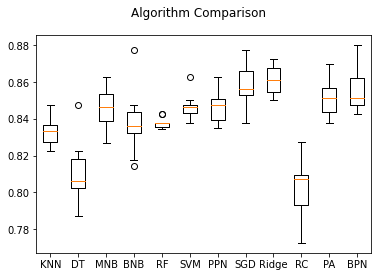

In [0]:
#Comparision of Algorithms
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn import svm
# prepare models
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=10)))
models.append(('DT', tree.DecisionTreeClassifier()))
#models.append(('KNN', KNeighborsClassifier()))
models.append(('MNB', MultinomialNB(alpha=.01)))
models.append(('BNB', BernoulliNB(alpha=.01)))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('SVM', svm.SVC()))
models.append(('PPN', Perceptron(max_iter=50, tol=1e-3)))
models.append(('SGD', SGDClassifier(alpha=.0001, max_iter=50,penalty="l1")))
models.append(('Ridge', RidgeClassifier(tol=1e-2, solver="sag")))
models.append(('RC', NearestCentroid()))
models.append(('PA', PassiveAggressiveClassifier(max_iter=50, tol=1e-3)))
models.append(('BPN', MLPClassifier()))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = StratifiedKFold(n_splits=10)
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [0]:
#.......Evaluationg Accuracy, precision, recall, f1-score for all algo....#

In [0]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10) # Define the split - into 2 folds 
skf.get_n_splits(X,Y)
print(skf)

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)


In [0]:
#.................SVM................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
from sklearn import svm
model = svm.SVC()
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)

a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

Accuracy: 0.8464598997493734 0.006483500252876395
Precision: 0.8557729954874025 0.017938780934233133
Recall: 0.8464598997493734 0.006483500252876395
F1-score: 0.7922503045173995 0.012029195495573108


In [0]:
#.................KNN................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
from sklearn import svm
model = KNeighborsClassifier(n_neighbors=10)
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)

a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

Accuracy: 0.8334580200501254 0.007848555328560332
Precision: 0.7947860294676159 0.021839155610132877
Recall: 0.8334580200501254 0.007848555328560332
F1-score: 0.7860065544708955 0.012119578627520035


In [0]:
#.................DT................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
from sklearn import tree
model = tree.DecisionTreeClassifier()
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)

a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

Accuracy: 0.8024511278195489 0.014440468673417165
Precision: 0.8031492893070254 0.014852980183164737
Recall: 0.8024511278195489 0.014440468673417165
F1-score: 0.8023304573327603 0.013523091672349176


In [0]:
#.................RF................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)

a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

Accuracy: 0.8347080200501253 0.003281351950059535
Precision: 0.8478017020991876 0.023591175808839866
Recall: 0.8347080200501253 0.003281351950059535
F1-score: 0.7656880769690737 0.006827625147018572


In [0]:
#.................MNB................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
model = MultinomialNB(alpha=.01)
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)

a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

Accuracy: 0.8459567669172932 0.00996827196434334
Precision: 0.832770359977402 0.011976766749848114
Recall: 0.8459567669172932 0.00996827196434334
F1-score: 0.8368246113618975 0.010748750022075254


In [0]:
#.................BNB................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
model = BernoulliNB(alpha=.01)
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)

a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

Accuracy: 0.8379536340852131 0.016565089201772694
Precision: 0.8438911623315821 0.017121013207869126
Recall: 0.8379536340852131 0.016565089201772694
F1-score: 0.8401051028320514 0.01576856107423965


In [0]:
#.................PPN................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
model = Perceptron(max_iter=50, tol=1e-3)
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)

a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

Accuracy: 0.8462130325814536 0.008207478698021492
Precision: 0.8360021327273854 0.0073889089343968095
Recall: 0.8462130325814536 0.008207478698021492
F1-score: 0.8390031096459882 0.0066754451992121835


In [0]:
#.................SGD................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
model = SGDClassifier(alpha=.0001, max_iter=50,penalty="l1")
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)

a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

Accuracy: 0.8562117794486216 0.008859712576830684
Precision: 0.8394130829489189 0.010932660322597843
Recall: 0.8562117794486216 0.008859712576830684
F1-score: 0.839436148161974 0.010051375682885564


In [0]:
#.................Ridge................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
model = RidgeClassifier(tol=1e-2, solver="sag")
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)

a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).


Accuracy: 0.8609636591478698 0.008771999552175433
Precision: 0.84681034720619 0.014288206212470553
Recall: 0.8609636591478698 0.008771999552175433
F1-score: 0.8368388475141485 0.011576450213969787


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '


In [0]:
#.................RC................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
model = NearestCentroid()
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)

a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

Accuracy: 0.8026967418546367 0.015361067713671867
Precision: 0.8555406601434197 0.012888905967433582
Recall: 0.8026967418546367 0.015361067713671867
F1-score: 0.8193421712889783 0.01286579176841705


In [0]:
#.................PA................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
model = PassiveAggressiveClassifier(max_iter=50, tol=1e-3)
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)

a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

Accuracy: 0.8509636591478698 0.008658588747640077
Precision: 0.8390559232258556 0.0074816715094764615
Recall: 0.8509636591478698 0.008658588747640077
F1-score: 0.8427641904341494 0.007517761545651001


In [0]:
#.................BPN................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
model = MLPClassifier()
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)

a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

Accuracy: 0.8544636591478696 0.009860301469309721
Precision: 0.8392035032575134 0.011636757535518861
Recall: 0.8544636591478696 0.009860301469309721
F1-score: 0.8417232208027519 0.010990599899801442


In [0]:
#.......................END..........................